In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math
import joblib
from datetime import datetime
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score, KFold,validation_curve,GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [52]:
data = pd.read_csv("data_pre_process.csv")
print(data.columns)
# Function to standardize column names
def standardize_column_names(df):
    ## Convert column names to lowercase
    # df.columns = df.columns.str.lower()
    
    # Replace spaces with underscores
    df.columns = df.columns.str.replace(' ', '_')
    
    # Remove parentheses and any other special characters
    df.columns = df.columns.str.replace(r'[^\w\s]', '')

# Standardize column names
standardize_column_names(data)

print(data.columns)

print(data.info())
print(data.describe())



Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')
Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax',

In [53]:
data_fso = data.drop(columns=["RFL_Att"])
data_rfl = data.drop(columns=["FSO_Att"])

Xtrain_fso, Xtemp_fso, Ytrain_fso, Ytemp_fso = train_test_split(data_fso.drop(columns=["FSO_Att","Frequency"]), data_fso['FSO_Att'],test_size=0.3,  random_state=42)
Xval_fso, Xtest_fso, Yval_fso, Ytest_fso = train_test_split(Xtemp_fso, Ytemp_fso, test_size=0.5, random_state=42)

print("Training set feature count:", Xtrain_fso.shape)
print("Validation set feature count:", Xval_fso.shape)
print("Test set feature count:", Xtest_fso.shape)
print("Training set label count:", Ytrain_fso.shape)
print("Validation set label count:", Yval_fso.shape)
print("Test set label count:", Ytest_fso.shape)

Xtrain_rfl, Xtemp_rfl, Ytrain_rfl, Ytemp_rfl = train_test_split(data_rfl.drop(columns=["RFL_Att"]), data_rfl['RFL_Att'],test_size=0.3,  random_state=42)
Xval_rfl, Xtest_rfl, Yval_rfl, Ytest_rfl = train_test_split(Xtemp_rfl, Ytemp_rfl, test_size=0.5, random_state=42)

print("Training set feature count:", Xtrain_rfl.shape)
print("Validation set feature count:", Xval_rfl.shape)
print("Test set feature count:", Xtest_rfl.shape)
print("Training set label count:", Ytrain_rfl.shape)
print("Validation set label count:", Yval_rfl.shape)
print("Test set label count:", Ytest_rfl.shape)

Training set feature count: (63965, 24)
Validation set feature count: (13707, 24)
Test set feature count: (13707, 24)
Training set label count: (63965,)
Validation set label count: (13707,)
Test set label count: (13707,)
Training set feature count: (63965, 25)
Validation set feature count: (13707, 25)
Test set feature count: (13707, 25)
Training set label count: (63965,)
Validation set label count: (13707,)
Test set label count: (13707,)


# DT for FSO

In [54]:
loaded_GS_mse =joblib.load("fso_gscv_mse_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl")
loaded_GS_r2 =joblib.load("fso_gscv_r2_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl")
#rfl_gscv_mse_202402211201_max_depth-15-29-8_min_samples_leaf-3-9-7_min_samples_split-4-9-6_DT.pkl
#rfl_gscv_r2_202402211201_max_depth-15-29-8_min_samples_leaf-3-9-7_min_samples_split-4-9-6_DT.pkl
print("Best parameters:", loaded_GS_mse.best_params_)
print("Best score:", np.sqrt(-loaded_GS_mse.best_score_))
print("Best parameters:", loaded_GS_r2.best_params_)
print("Best score:", loaded_GS_r2.best_score_)
# print("CV results:", loaded_GS_mse.cv_results_)
print(loaded_GS_mse.cv_results_.keys())

Best parameters: {'max_depth': 24, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score: 1.2414566326088277
Best parameters: {'max_depth': 24, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score: 0.8996299592471423
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [55]:
parameters = {#'splitter':('best','random')
              #,'criterion':("gini","entropy")，
              "max_depth":[*range(10,41,2)]
              ,'min_samples_leaf':[1,10,50,100]
              #,'min_impurity_decrease':[*np.linspace(0,0.5,20)
              ,'min_samples_split':[2,11,51,101]

             }
min_samples_leaf = parameters['min_samples_leaf']
max_depth_values = parameters['max_depth']
min_samples_split = parameters['min_samples_split']

results_mse = loaded_GS_mse.cv_results_
mean_rmse = np.sqrt(-results_mse['mean_test_score'])
results_r2 = loaded_GS_r2.cv_results_
mean_r2 = results_r2['mean_test_score']

# Reshape mean_rmse and mean_r2 to a 3D array for plotting
mean_rmse = mean_rmse.reshape(len(max_depth_values), len(min_samples_leaf),len(min_samples_split))
mean_r2 = mean_r2.reshape(len(max_depth_values), len(min_samples_leaf),len(min_samples_split))

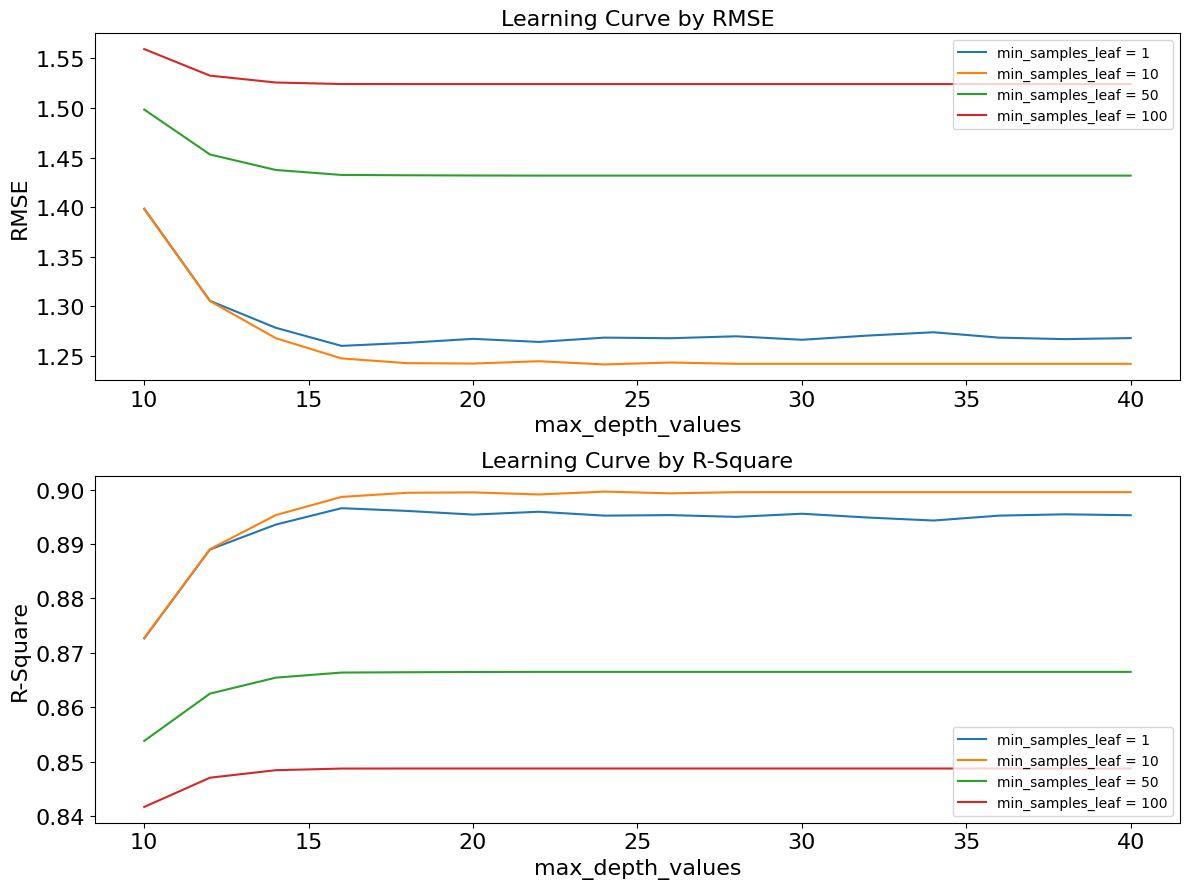

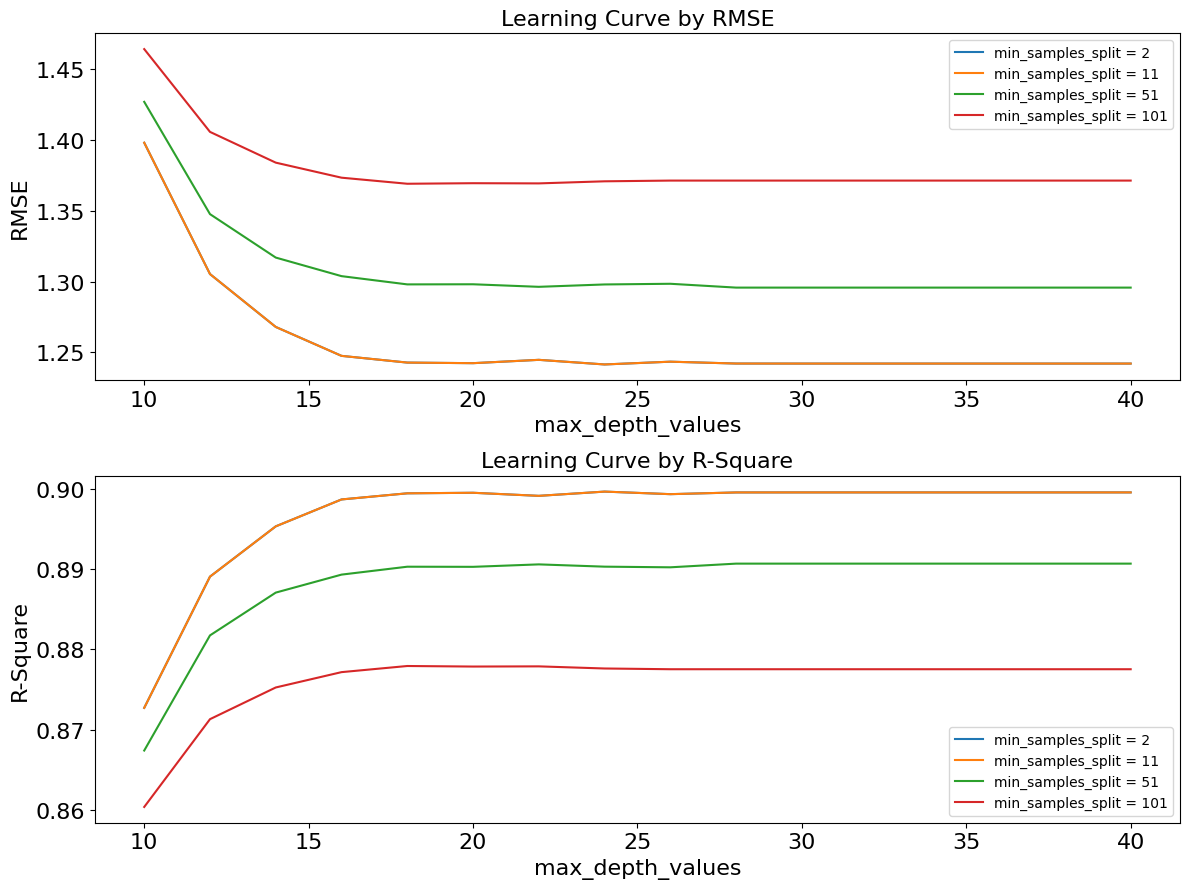

In [56]:
fig, axs = plt.subplots(2, 1, figsize=(12, 9))
#fig.suptitle("Figure 4 Learning Curve for Decision Tree Regression Model", fontsize=16)

for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    axs[0].plot(max_depth_values, mean_rmse[:,i,1], label=f'min_samples_leaf = {min_samples_leaf_}')
axs[0].set_title("Learning Curve by RMSE")
axs[0].legend()
axs[0].set_xlabel("max_depth_values")
axs[0].set_ylabel("RMSE")

for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    axs[1].plot(max_depth_values, mean_r2[:,i,1], label=f'min_samples_leaf = {min_samples_leaf_}')
axs[1].set_title("Learning Curve by R-Square")
axs[1].legend()
axs[1].set_xlabel("max_depth_values")
axs[1].set_ylabel("R-Square")


plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(12, 9))
#fig.suptitle("Figure 4 Learning Curve for Decision Tree Regression Model", fontsize=16)

for i, min_samples_leaf_ in enumerate(min_samples_split):
    axs[0].plot(max_depth_values, mean_rmse[:,1,i], label=f'min_samples_split = {min_samples_leaf_}')
axs[0].set_title("Learning Curve by RMSE")
axs[0].legend()
axs[0].set_xlabel("max_depth_values")
axs[0].set_ylabel("RMSE")

for i, min_samples_leaf_ in enumerate(min_samples_split):
    axs[1].plot(max_depth_values, mean_r2[:,1,i], label=f'min_samples_split = {min_samples_leaf_}')
axs[1].set_title("Learning Curve by R-Square")
axs[1].legend()
axs[1].set_xlabel("max_depth_values")
axs[1].set_ylabel("R-Square")


plt.tight_layout()
plt.show()

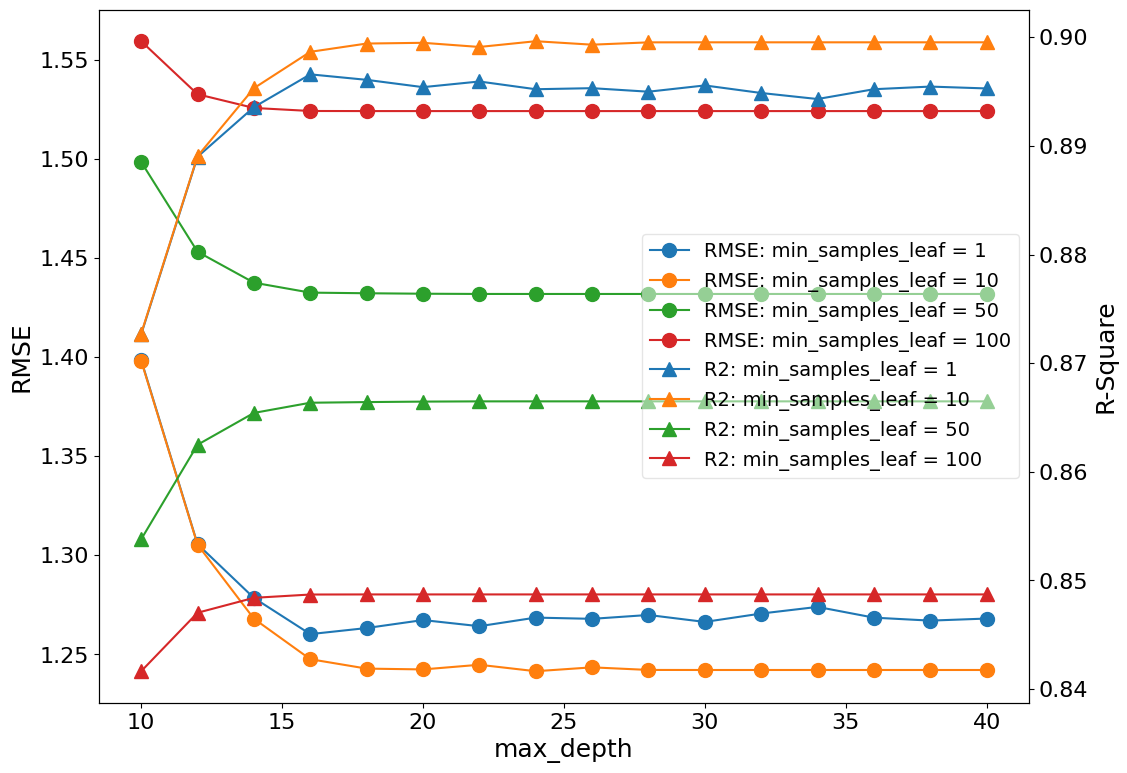

In [57]:


fig, axs = plt.subplots(1, 1, figsize=(12, 9))
#fig.suptitle("FSO_Att Decision Tree Regression Model", fontsize=20)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
# Plot RMSE
for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    #if i%2 == 0:
    axs.plot(max_depth_values, mean_rmse[:, i, 1], \
            label=f'RMSE: min_samples_leaf = {min_samples_leaf_}', \
            marker='o', markersize=10)
#axs.set_title("Learning Curve by RMSE and R2 in Training Set", fontsize=18)
axs.set_xlabel("max_depth", fontsize=18)  
axs.set_ylabel("RMSE", fontsize=18)  
axs.tick_params(axis='both', labelsize=16)  

# Create a twin x-axis with different y-axis
axs_r2 = axs.twinx()

# Plot R-Square
for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    #if i%2 == 0:
    axs_r2.plot(max_depth_values, mean_r2[:, i, 1], \
                    label=f'R2: min_samples_leaf = {min_samples_leaf_}', \
                    marker='^', markersize=10)
axs_r2.set_ylabel("R-Square", fontsize=18)  
axs_r2.tick_params(axis='y', labelsize=16)  

# Add legend with English labels and set to semi-transparent
lines, labels = axs.get_legend_handles_labels()
lines_r2, labels_r2 = axs_r2.get_legend_handles_labels()
axs_r2.legend(lines + lines_r2, labels + labels_r2, loc='right', framealpha=0.5,fontsize = 14)

plt.show()


In [37]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict target values using the loaded models
y_pred_mse = loaded_GS_mse.predict(Xval_fso)
y_pred_r2 = loaded_GS_r2.predict(Xval_fso)

# Calculate R2 scores
fso_val_r2 = r2_score(Yval_fso, y_pred_r2)
# Calculate RMSE scores
fso_val_rmse = np.sqrt(mean_squared_error(Yval_fso, y_pred_mse))


# Print scores
print("R2 score", fso_val_r2)
print("RMSE score ", fso_val_rmse)



R2 score 0.9051597275234311
RMSE score  1.194467976120242


In [ ]:
from joblib import Parallel, delayed

# 定义一个函数，用于预测单个参数组合的 R2 和 RMSE，并返回结果
def predict_r2_rmse(max_depth, min_samples_leaf, min_samples_split):
    # 创建模型并拟合数据
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=25)
    model.fit(Xtrain_fso, Ytrain_fso)
    
    # 进行预测
    y_pred = model.predict(Xval_fso)
    
    # 计算 R2 和 RMSE 并返回结果
    return np.sqrt(mean_squared_error(Yval_fso, y_pred)), r2_score(Yval_fso, y_pred)

# 使用 joblib 的 Parallel 和 delayed 函数来并行执行预测
results = Parallel(n_jobs=-1)(delayed(predict_r2_rmse)(max_depth, min_samples_leaf, min_samples_split)
                               for max_depth in max_depth_values
                               for min_samples_leaf in min_samples_leaf_values
                               for min_samples_split in min_samples_split_values)

# 将结果重新整形为数组
predictions_rmse = np.array([result[0] for result in results]).reshape(len(max_depth_values), len(min_samples_leaf_values), len(min_samples_split_values))
predictions_r2 = np.array([result[1] for result in results]).reshape(len(max_depth_values), len(min_samples_leaf_values), len(min_samples_split_values))

# 打印或处理预测结果
print("RMSE predictions:", predictions_rmse)
print("R2 predictions:", predictions_r2)


In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12, 9))
fig.suptitle("FSO_Att Decision Tree Regression Model", fontsize=20)

# Plot RMSE
for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    axs.plot(max_depth_values, predictions_rmse[:, i, 0], \
             label=f'RMSE: min_samples_leaf = {min_samples_leaf_}', \
             marker='o', markersize=10)
axs.set_title("Learning Curve by RMSE and R2 in Validation Set", fontsize=18)
axs.set_xlabel("max_depth_values", fontsize=18)  # 设置 x 轴标签的字体大小
axs.set_ylabel("RMSE", fontsize=18)  # 设置 y 轴标签的字体大小
axs.tick_params(axis='both', labelsize=16)  # 设置刻度标签的字体大小

# Create a twin x-axis with different y-axis
axs_r2 = axs.twinx()

# Plot R-Square
for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    axs_r2.plot(max_depth_values, predictions_r2[:, i, 0], \
                label=f'R2: min_samples_leaf = {min_samples_leaf_}', \
                marker='s', markersize=10)
axs_r2.set_ylabel("R-Square", fontsize=18)  # 设置次坐标轴的 y 轴标签的字体大小
axs_r2.tick_params(axis='y', labelsize=16)  # 设置次坐标轴的刻度标签的字体大小

# Add legend with English labels and set to semi-transparent
lines, labels = axs.get_legend_handles_labels()
lines_r2, labels_r2 = axs_r2.get_legend_handles_labels()
axs_r2.legend(lines + lines_r2, labels + labels_r2, loc='upper right', framealpha=0.5)

plt.show()

# DT for RFL

In [60]:
loaded_GS_mse =joblib.load("rfl_gscv_mse_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl")
loaded_GS_r2 =joblib.load("rfl_gscv_r2_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl")

print("Best parameters:", loaded_GS_mse.best_params_)
print("Best score:", np.sqrt(-loaded_GS_mse.best_score_))
print("Best parameters:", loaded_GS_r2.best_params_)
print("Best score:", loaded_GS_r2.best_score_)
# print("CV results:", loaded_GS_mse.cv_results_)
print(loaded_GS_mse.cv_results_.keys())

Best parameters: {'max_depth': 22, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score: 0.7664264176840989
Best parameters: {'max_depth': 22, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score: 0.9504637011470064
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [61]:

min_samples_leaf = parameters['min_samples_leaf']
max_depth_values = parameters['max_depth']
min_samples_split = parameters['min_samples_split']

results_mse = loaded_GS_mse.cv_results_
mean_rmse = np.sqrt(-results_mse['mean_test_score'])
results_r2 = loaded_GS_r2.cv_results_
mean_r2 = results_r2['mean_test_score']

# Reshape mean_rmse and mean_r2 to a 3D array for plotting
mean_rmse = mean_rmse.reshape(len(max_depth_values), len(min_samples_leaf),len(min_samples_split))
mean_r2 = mean_r2.reshape(len(max_depth_values), len(min_samples_leaf),len(min_samples_split))

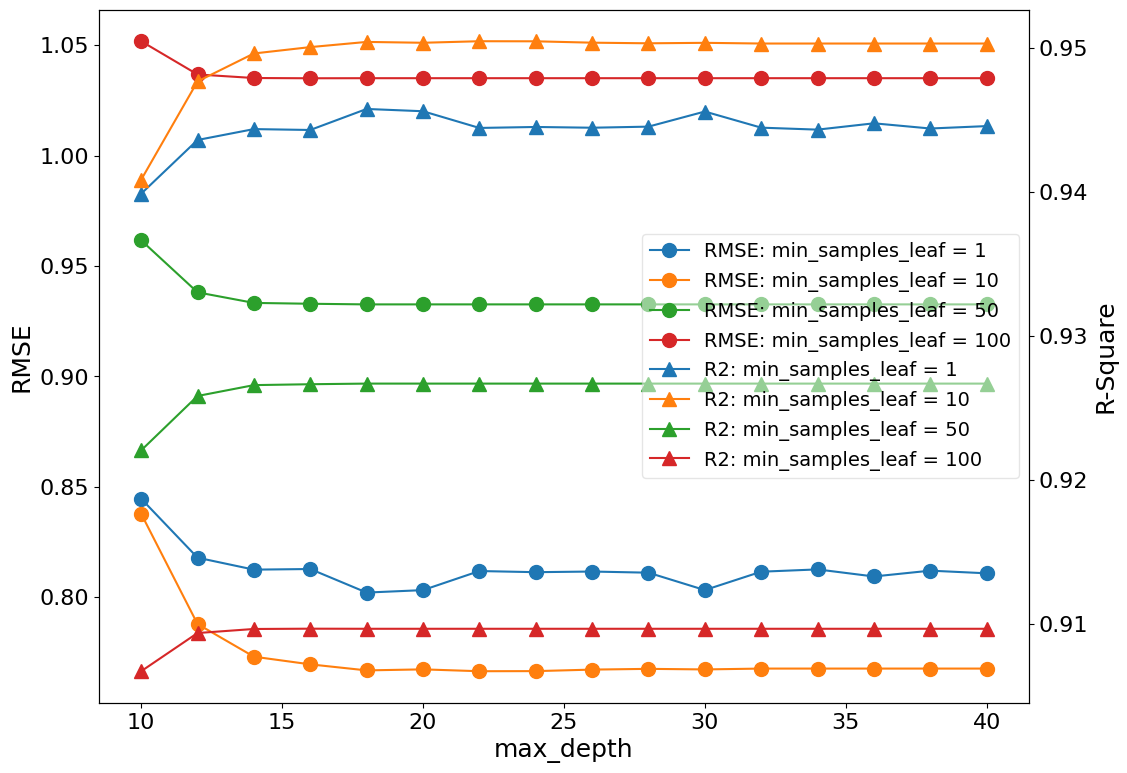

In [63]:
fig, axs = plt.subplots(1, 1, figsize=(12, 9))
#fig.suptitle("RFL_Att Decision Tree Regression Model", fontsize=20)

# Plot RMSE
for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    axs.plot(max_depth_values, mean_rmse[:, i, 1], \
                label=f'RMSE: min_samples_leaf = {min_samples_leaf_}', \
                marker='o', markersize=10)
#axs.set_title("Learning Curve by RMSE and R2 in Training Set", fontsize=18)
axs.set_xlabel("max_depth", fontsize=18)  
axs.set_ylabel("RMSE", fontsize=18)  
axs.tick_params(axis='both', labelsize=16)  

# Create a twin x-axis with different y-axis
axs_r2 = axs.twinx()

# Plot R-Square
for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    axs_r2.plot(max_depth_values, mean_r2[:, i, 1], \
                    label=f'R2: min_samples_leaf = {min_samples_leaf_}', \
                    marker='^', markersize=10)
axs_r2.set_ylabel("R-Square", fontsize=18)  
axs_r2.tick_params(axis='y', labelsize=16)  

# Add legend with English labels and set to semi-transparent
lines, labels = axs.get_legend_handles_labels()
lines_r2, labels_r2 = axs_r2.get_legend_handles_labels()
axs_r2.legend(lines + lines_r2, labels + labels_r2, loc='right', framealpha=0.5,fontsize = 14)

plt.show()

In [48]:
y_pred_mse = loaded_GS_mse.predict(Xval_rfl)
y_pred_r2 = loaded_GS_r2.predict(Xval_rfl)

# Calculate R2 scores
fso_val_r2 = r2_score(Yval_rfl, y_pred_r2)
# Calculate RMSE scores
fso_val_rmse = np.sqrt(mean_squared_error(Yval_rfl, y_pred_mse))


# Print scores
print("R2 score", fso_val_r2)
print("RMSE score ", fso_val_rmse)

R2 score 0.9545611113719782
RMSE score  0.7303448815225295


In [ ]:


max_depth_values = parameters["max_depth"]
min_samples_leaf_values = parameters["min_samples_leaf"]
min_samples_split_values = parameters["min_samples_split"]

# Define a function to predict the R2 and RMSE for a single set of parameters and return the results.
def predict_r2_rmse(max_depth, min_samples_leaf, min_samples_split):
    # create model and fit
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=25)
    model.fit(Xtrain_rfl, Ytrain_rfl)
    
    # prediction
    y_pred = model.predict(Xval_rfl)
    
    # calculate R2 and rmse
    return np.sqrt(mean_squared_error(Yval_rfl, y_pred)), r2_score(Yval_rfl, y_pred)

# 使用 joblib 的 Parallel 和 delayed 函数来并行执行预测
results = Parallel(n_jobs=-1)(delayed(predict_r2_rmse)(max_depth, min_samples_leaf, min_samples_split)
                               for max_depth in max_depth_values
                               for min_samples_leaf in min_samples_leaf_values
                               for min_samples_split in min_samples_split_values)

# reconnstruct result
predictions_rmse = np.array([result[0] for result in results]).reshape(len(max_depth_values), len(min_samples_leaf_values), len(min_samples_split_values))
predictions_r2 = np.array([result[1] for result in results]).reshape(len(max_depth_values), len(min_samples_leaf_values), len(min_samples_split_values))


print("RMSE predictions:", predictions_rmse)
print("R2 predictions:", predictions_r2)


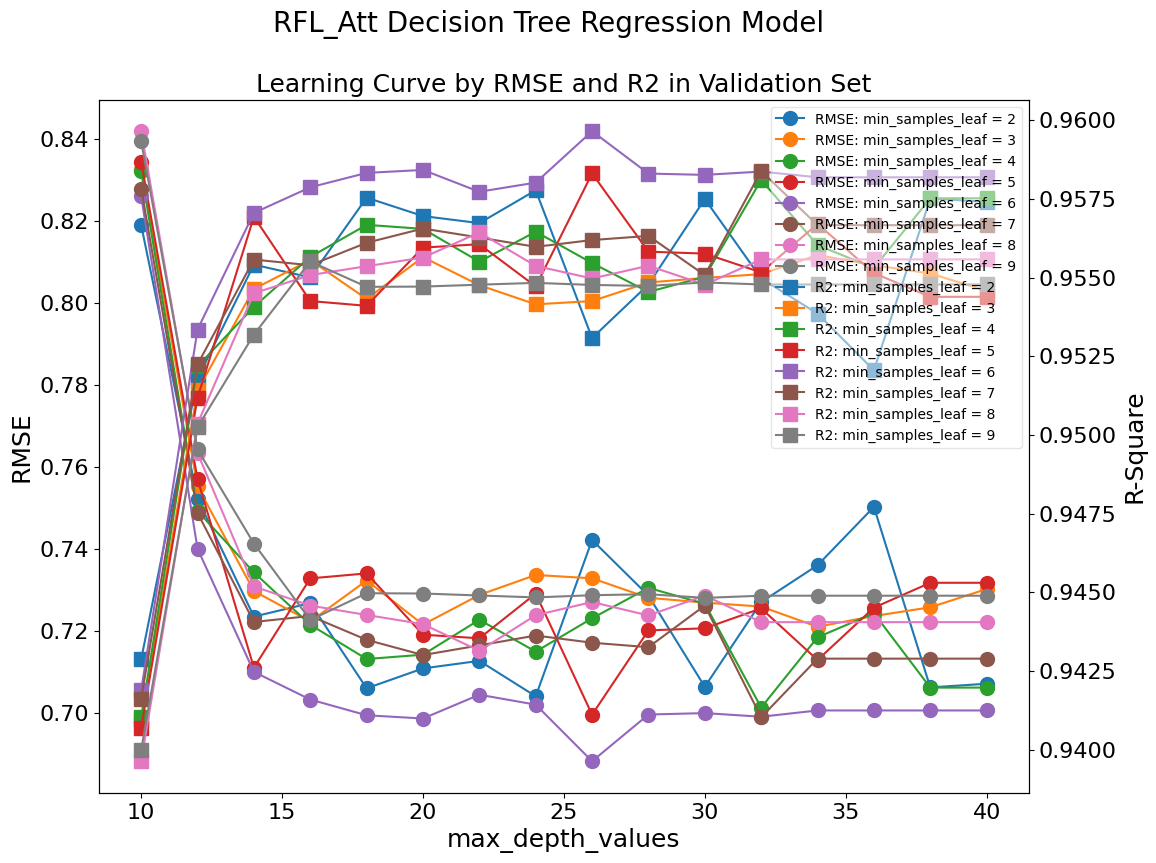

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12, 9))
fig.suptitle("RFL_Att Decision Tree Regression Model", fontsize=20)

# Plot RMSE
for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    axs.plot(max_depth_values, predictions_rmse[:, i, 0], \
             label=f'RMSE: min_samples_leaf = {min_samples_leaf_}', \
             marker='o', markersize=10)
axs.set_title("Learning Curve by RMSE and R2 in Validation Set", fontsize=18)
axs.set_xlabel("max_depth_values", fontsize=18)  
axs.set_ylabel("RMSE", fontsize=18)  
axs.tick_params(axis='both', labelsize=16) 

# Create a twin x-axis with different y-axis
axs_r2 = axs.twinx()

# Plot R-Square
for i, min_samples_leaf_ in enumerate(min_samples_leaf):
    axs_r2.plot(max_depth_values, predictions_r2[:, i, 0], \
                label=f'R2: min_samples_leaf = {min_samples_leaf_}', \
                marker='s', markersize=10)
axs_r2.set_ylabel("R-Square", fontsize=18)  
axs_r2.tick_params(axis='y', labelsize=16)  

# Add legend with English labels and set to semi-transparent
lines, labels = axs.get_legend_handles_labels()
lines_r2, labels_r2 = axs_r2.get_legend_handles_labels()
axs_r2.legend(lines + lines_r2, labels + labels_r2, loc='upper right', framealpha=0.5)

plt.show()

In [ ]:
result_data = pd.read_csv("results_202402222107_n_estimators-100-300-11_max_depth-15-30-4_min_samples_leaf-4-7-4_min_samples_split-3-3-1_RFFSO.csv")

train_mse best:
     n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
142           300         30                 4                  3   0.265686   

     train_r2   val_mse   val_r2  
142  0.982698  0.774906  0.94849  
valid_mse best:
     n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
142           300         30                 4                  3   0.265686   

     train_r2   val_mse   val_r2  
142  0.982698  0.774906  0.94849  


min_samples_leaf = 4 且 min_samples_split = 3 的所有行:
     n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
0             100         15                 4                  3   0.437107   
1             120         15                 4                  3   0.434814   
2             140         15                 4                  3   0.434395   
3             160         15                 4                  3   0.434118   
4             180         15                 4                  3   0.433840   
5             200         15                 4                  3   0.433101   
6             220         15                 4                  3   0.432516   
7             240         15                 4                  3   0.431681   
8             260         15                 4                  3   0.431746   
9             280         15                 4                  3   0.431711   
10            300         15                 4                  3   0

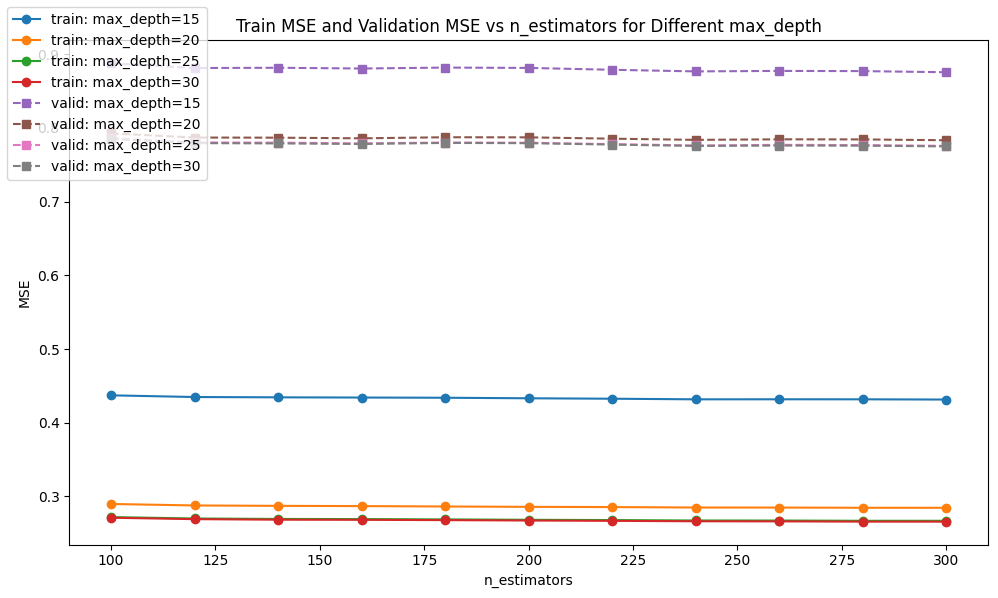

In [ ]:
# 按 max_depth 分组
import matplotlib.pyplot as plt

# 按 max_depth 分组
grouped = select_esti.groupby('max_depth')

# 创建图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 遍历每个分组
for name, group in grouped:
    ax1.plot(group['n_estimators'], group['train_mse'], marker='o', label=f"train: max_depth={name}")

# 添加第一个 Y 轴标签
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='y')


# 绘制第二个 Y 轴数据
for name, group in grouped:
    ax1.plot(group['n_estimators'], group['val_mse'], marker='s', linestyle='--', label=f"valid:max_depth={name}")

# 添加第二个 Y 轴标签



# 添加标题和图例
plt.title('Train MSE and Validation MSE vs n_estimators for Different max_depth')
fig.tight_layout()
fig.legend(loc='upper left')

# 显示图
plt.show()


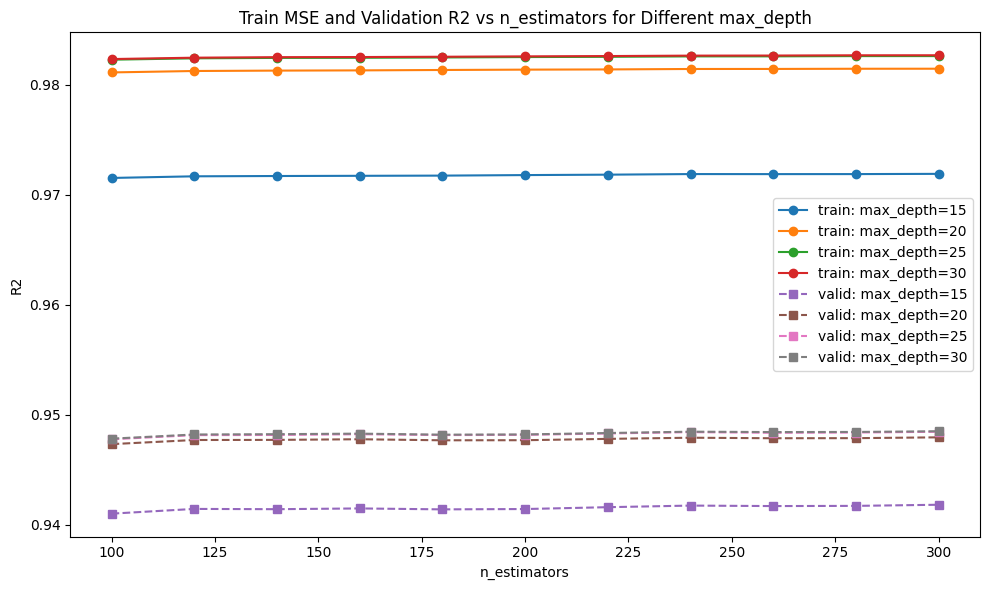

In [18]:
# 按 max_depth 分组
grouped = select_esti.groupby('max_depth')

# 创建图
fig, ax1 = plt.subplots(figsize=(12, 9))

# 遍历每个分组
for name, group in grouped:
    ax1.plot(group['n_estimators'], group['train_r2'], marker='o', label=f"train: max_depth={name}")

# 添加第一个 Y 轴标签
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('R2')
ax1.tick_params(axis='y')


# 绘制第二个 Y 轴数据
for name, group in grouped:
    ax1.plot(group['n_estimators'], group['val_r2'], marker='s', linestyle='--', label=f"valid: max_depth={name}")

# 添加第二个 Y 轴标签

ax1.legend(loc='right')

# 添加标题和图例
plt.title('Train and Validation R2 vs n_estimators for Different max_depth')
fig.tight_layout()


# 显示图
plt.show()

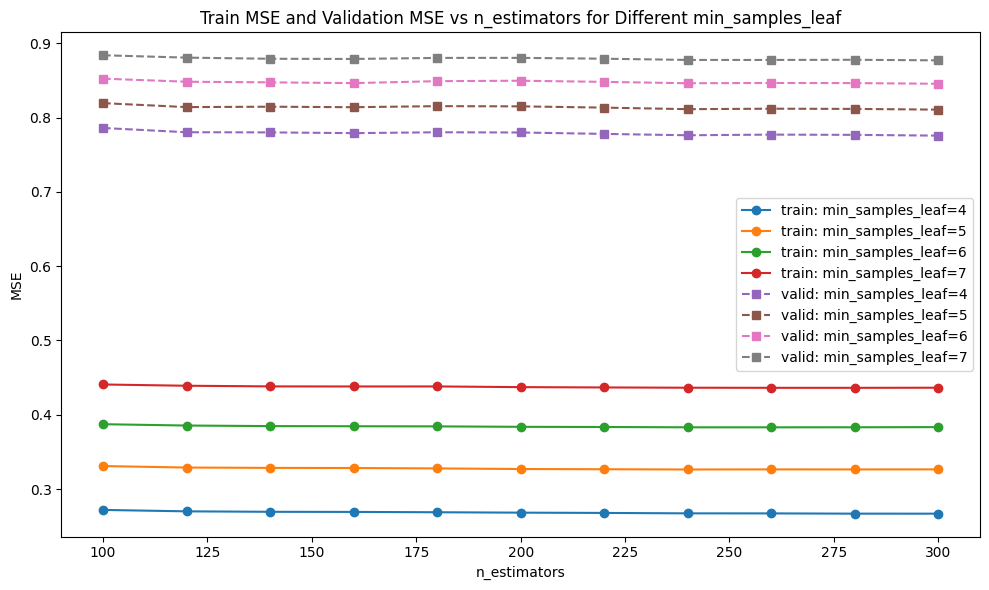

In [20]:
select_esti = df[(df['max_depth'] == 25) & (df['min_samples_split'] == 3)]

# 按 max_depth 分组
import matplotlib.pyplot as plt

# 按 max_depth 分组
grouped = select_esti.groupby('min_samples_leaf')

# 创建图
fig, ax1 = plt.subplots(figsize=(12, 9))

# 遍历每个分组
for name, group in grouped:
    ax1.plot(group['n_estimators'], group['train_mse'], marker='o', label=f"train: min_samples_leaf={name}")

# 添加第一个 Y 轴标签
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='y')


# 绘制第二个 Y 轴数据
for name, group in grouped:
    ax1.plot(group['n_estimators'], group['val_mse'], marker='s', linestyle='--', label=f"valid: min_samples_leaf={name}")

# 添加第二个 Y 轴标签
ax1.legend(loc= "right")


# 添加标题和图例
plt.title('Train and Validation MSE vs n_estimators for Different min_samples_leaf')
fig.tight_layout()


# 显示图
plt.show()

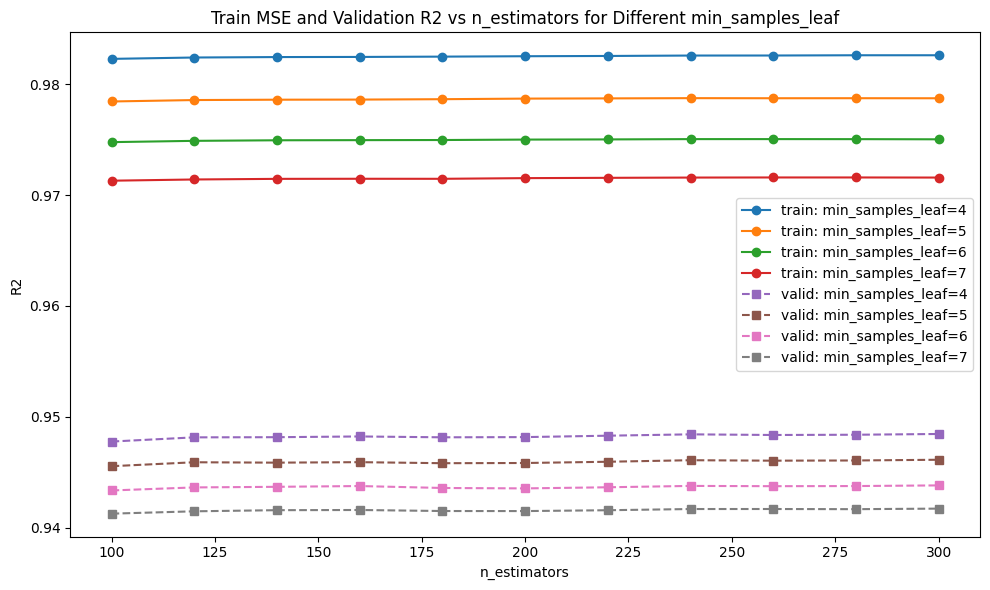

In [21]:
# 按 max_depth 分组
grouped = select_esti.groupby('min_samples_leaf')

# 创建图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 遍历每个分组
for name, group in grouped:
    ax1.plot(group['n_estimators'], group['train_r2'], marker='o', label=f"train: min_samples_leaf={name}")

# 添加第一个 Y 轴标签
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('R2')
ax1.tick_params(axis='y')


# 绘制第二个 Y 轴数据
for name, group in grouped:
    ax1.plot(group['n_estimators'], group['val_r2'], marker='s', linestyle='--', label=f"valid: min_samples_leaf={name}")

# 添加第二个 Y 轴标签
ax1.legend(loc= "right")


# 添加标题和图例
plt.title('Train MSE and Validation R2 vs n_estimators for Different min_samples_leaf')
fig.tight_layout()


# 显示图
plt.show()

In [38]:
def plot_results(df, group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',legend_loc = "upper right"):
    # 按 group_column 分组
    grouped = df.groupby(group_column)

    # 创建图
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9))
# 定义颜色列表
    colors = ['blue', 'green', 'red', \
              'purple', 'orange', 'brown', \
                'pink', 'gray', 'cyan', 'magenta']
    # 遍历每个分组
    for i, (name, group) in enumerate(grouped):
        color = colors[i % len(colors)]  # 循环使用颜色列表中的颜色
        ax1.plot(group[Xaxis], np.sqrt(group['train_mse']), marker='o', color=color, label=f"train: {group_column}={name}")
        ax1.plot(group[Xaxis], np.sqrt(group['val_mse']), marker='s', linestyle='--', color=color, label=f"valid: {group_column}={name}")

    # 添加标签和图例
    ax1.set_xlabel(f'{Xaxis}', fontsize=18)
    ax1.set_ylabel(f'{metrics}', fontsize=18)
    ax1.tick_params(axis='both', labelsize=16)
    ax1.legend(loc=legend_loc, framealpha=0.5)
    ax1.set_title(f'Train {metrics} and Validation {metrics} vs {Xaxis} for Different {group_column}',fontsize=18)

    for i, (name, group) in enumerate(grouped):
        color = colors[i % len(colors)]  # 循环使用颜色列表中的颜色
        ax2.plot(group[Xaxis], np.sqrt(group['train_r2']), marker='o', color=color, label=f"train: {group_column}={name}")
        ax2.plot(group[Xaxis], np.sqrt(group['val_r2']), marker='s', linestyle='--', color=color, label=f"valid: {group_column}={name}")

    ax2.set_xlabel(f'{Xaxis}', fontsize=18)
    ax2.set_ylabel(f'{metrics1}', fontsize=18)
    ax2.tick_params(axis='both', labelsize=16)
    ax2.legend(loc=legend_loc, framealpha=0.5)
    ax2.set_title(f'Train {metrics1} and Validation {metrics1} vs {Xaxis} for Different {group_column}', fontsize=18)

    fig.tight_layout()

# 显示图
plt.show()


In [ ]:
def plot_coarse_tuning(df, group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',legend_loc = "upper right"):
    # 按 group_column 分组
    grouped = df.groupby(group_column)

    # 创建图
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9))
# 定义颜色列表
    colors = ['blue', 'green', 'red', \
              'purple', 'orange', 'brown', \
                'pink', 'gray', 'cyan', 'magenta']
    # 遍历每个分组
    for i, (name, group) in enumerate(grouped):
        color = colors[i % len(colors)]  # 循环使用颜色列表中的颜色
        ax1.plot(group[Xaxis], np.sqrt(group['train_mse']), marker='o', color=color, label=f"train_rmse: {group_column}={name}")
        ax1.plot(group[Xaxis], np.sqrt(group['train_r2']), marker='s', linestyle='--', color=color, label=f"train_r2: {group_column}={name}")

    # 添加标签和图例
    ax1.set_xlabel(f'{Xaxis}', fontsize=18)
    ax1.set_ylabel(f'{metrics}', fontsize=18)
    ax1.tick_params(axis='both', labelsize=16)
    ax1.legend(loc=legend_loc, framealpha=0.5)
    ax1.set_title(f'Train {metrics} and {metrics1} vs {Xaxis} for Different {group_column}',fontsize=18)

    for i, (name, group) in enumerate(grouped):
        color = colors[i % len(colors)]  # 循环使用颜色列表中的颜色
        ax2.plot(group[Xaxis], np.sqrt(group['val_mse']), marker='o', color=color, label=f"val_rmse: {group_column}={name}")
        ax2.plot(group[Xaxis], np.sqrt(group['val_r2']), marker='s', linestyle='--', color=color, label=f"val_r2: {group_column}={name}")

    ax2.set_xlabel(f'{Xaxis}', fontsize=18)
    ax2.set_ylabel(f'{metrics1}', fontsize=18)
    ax2.tick_params(axis='both', labelsize=16)
    ax2.legend(loc=legend_loc, framealpha=0.5)
    ax2.set_title(f'Train {metrics1} and Validation {metrics1} vs {Xaxis} for Different {group_column}', fontsize=18)

    fig.tight_layout()

# 显示图
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fine_tunning(df, lis=None, group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right"):
    # Group the dataframe by group_column
    grouped = df.groupby(group_column)

    # If lis parameter is provided, only select the interested groups
    if lis:
        grouped = {key: group for key, group in grouped if key in lis}

    # Create the figure
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 9))
    ax2 = ax1.twinx()  # Create the second y-axis, shared with the first subplot
    ax4 = ax3.twinx()
    # Define the color list
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

    # Iterate over each group
    for i, (name, group) in enumerate(grouped.items()):
        color = colors[i % len(colors)]  # Cycle through the color list
        ax1.plot(group[Xaxis], np.sqrt(group['train_mse']), marker='o', markersize = markersize,color=color, label=f"train_rmse: {group_column}={name}")
        ax2.plot(group[Xaxis], group['train_r2'], marker='s',markersize = markersize, linestyle='--', color=color, label=f"train_r2: {group_column}={name}")

    # Add labels and legend to the first subplot
    ax1.set_xlabel(f'{Xaxis}', fontsize=18)
    ax1.set_ylabel(f'{metrics}', fontsize=18)
    ax1.tick_params(axis='both', labelsize=16)
    ax1.legend(loc=legend_loc, framealpha=0.5)
    ax1.set_title(f'Train {metrics} and {metrics1}', fontsize=18)

    # Set labels and legend for the second y-axis
    ax2.set_ylabel(f'{metrics1}', fontsize=18)
    ax2.tick_params(axis='y', labelsize=16)
    ax2.legend(loc=legend_loc1, framealpha=0.5)

    # Iterate over each group again for the second subplot
    for i, (name, group) in enumerate(grouped.items()):
        color = colors[i % len(colors)]  # Cycle through the color list
        ax3.plot(group[Xaxis], np.sqrt(group['val_mse']), marker='o', markersize = markersize,color=color, label=f"val_rmse: {group_column}={name}")
        ax4.plot(group[Xaxis], group['val_r2'], marker='s', markersize = markersize,linestyle='--', color=color, label=f"val_r2: {group_column}={name}")

    # Add labels and legend to the second subplot
    ax3.set_xlabel(f'{Xaxis}', fontsize=18)
    ax3.set_ylabel(f'{metrics}', fontsize=18)
    ax3.tick_params(axis='both', labelsize=16)
    ax3.legend(loc=legend_loc, framealpha=0.5)
    ax3.set_title(f'Validation {metrics} and {metrics1}', fontsize=18)

    # Set labels and legend for the second y-axis
    ax4.set_ylabel(f'{metrics1}', fontsize=18)
    ax4.tick_params(axis='y', labelsize=16)
    ax4.legend(loc=legend_loc1, framealpha=0.5)

    plt.tight_layout()

    # Display the plot
    plt.show()




In [26]:
result_data = pd.read_csv("results_202402222107_n_estimators-100-300-11_max_depth-15-30-4_min_samples_leaf-4-7-4_min_samples_split-3-3-1_RFFSO.csv")
df = result_data

# 找出train_mse最大的一行
min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]

print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]

print("valid_mse best:")
print(min_valid_mse_row)
select_esti = df[(df['min_samples_leaf'] == 4) & (df['min_samples_split'] == 3)]

train_mse best:
     n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
142           300         30                 4                  3   0.265686   

     train_r2   val_mse   val_r2  
142  0.982698  0.774906  0.94849  
valid_mse best:
     n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
142           300         30                 4                  3   0.265686   

     train_r2   val_mse   val_r2  
142  0.982698  0.774906  0.94849  


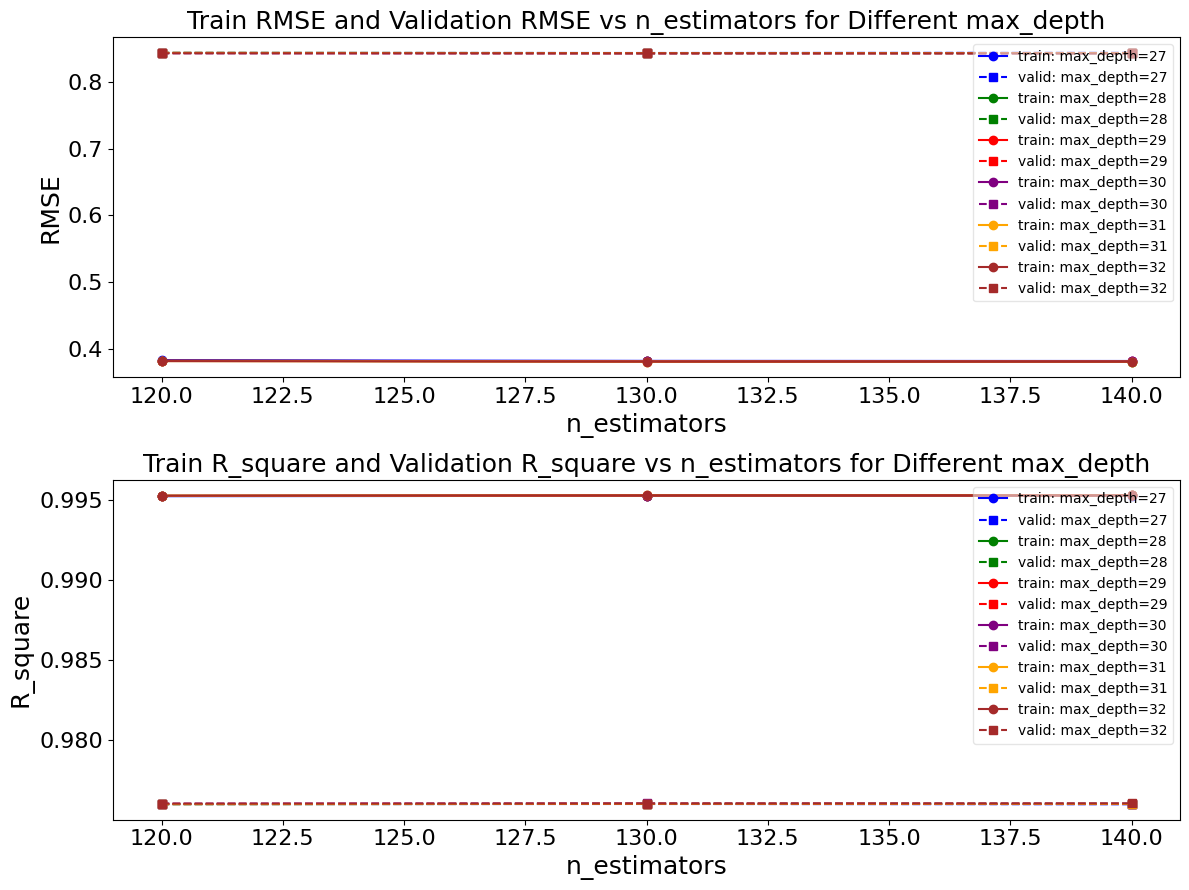

In [40]:
plot_results(select_esti, group_column='max_depth', Xaxis='n_estimators', metrics='RMSE', metrics1='R_square')


In [43]:
select_esti

,n_estimators,max_depth,min_samples_leaf,min_samples_split,train_mse,train_r2,val_mse,val_r2
0,120,27,2,2,0.146413,0.990465,0.712574,0.952633
1,130,27,2,2,0.145727,0.990510,0.712314,0.952651
2,140,27,2,2,0.145593,0.990519,0.712829,0.952616
24,120,28,2,2,0.145825,0.990503,0.712679,0.952626
25,130,28,2,2,0.145164,0.990546,0.712105,0.952664
26,140,28,2,2,0.144998,0.990557,0.712023,0.952670
48,120,29,2,2,0.145911,0.990498,0.712281,0.952653
49,130,29,2,2,0.145208,0.990544,0.711891,0.952679
50,140,29,2,2,0.145018,0.990556,0.712157,0.952661
72,120,30,2,2,0.145831,0.990503,0.711639,0.952695


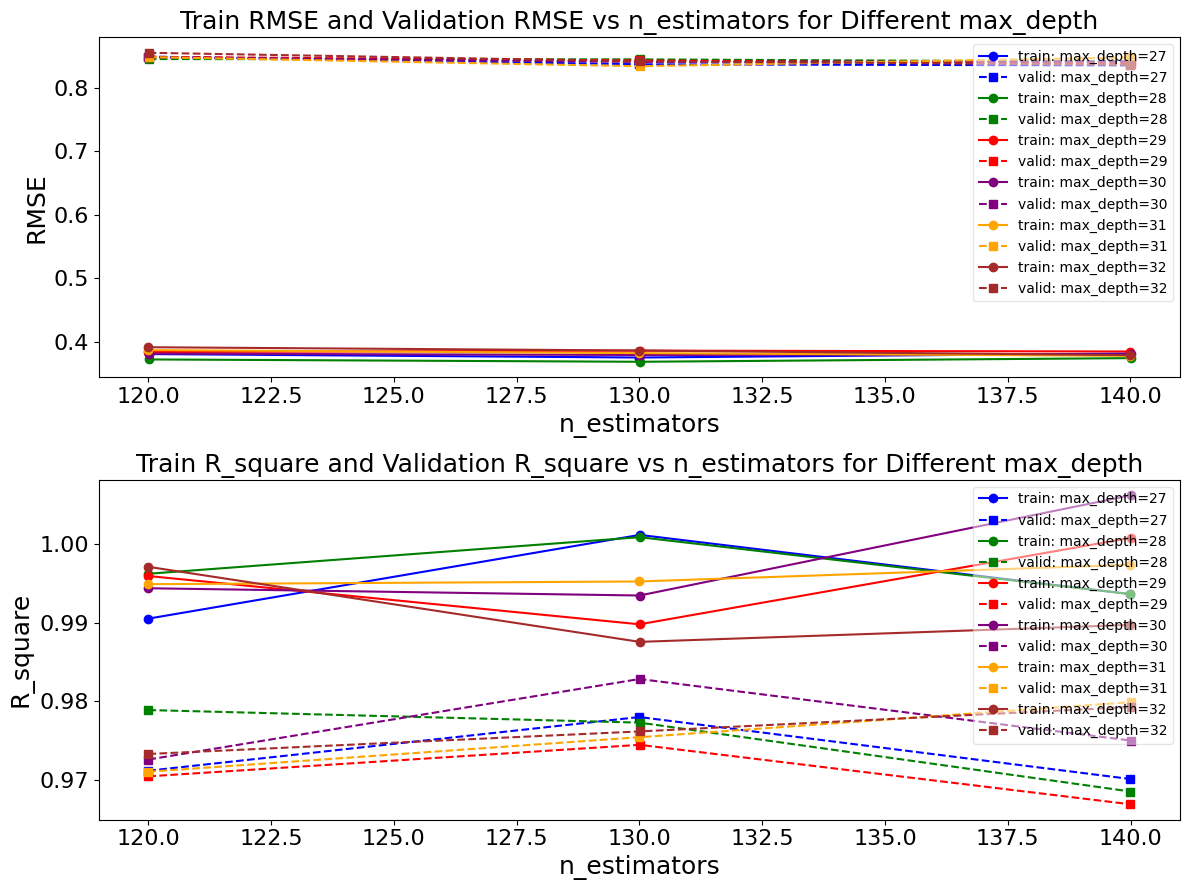

train_mse best:
     n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
122           140         32                 2                  2    0.14469   
125           140         32                 2                  3    0.14469   

     train_r2   val_mse    val_r2  
122  0.990577  0.711362  0.952714  
125  0.990577  0.711362  0.952714  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
73           130         30                 2                  2   0.145175   
76           130         30                 2                  3   0.145175   

    train_r2   val_mse    val_r2  
73  0.990546  0.711296  0.952718  
76  0.990546  0.711296  0.952718  


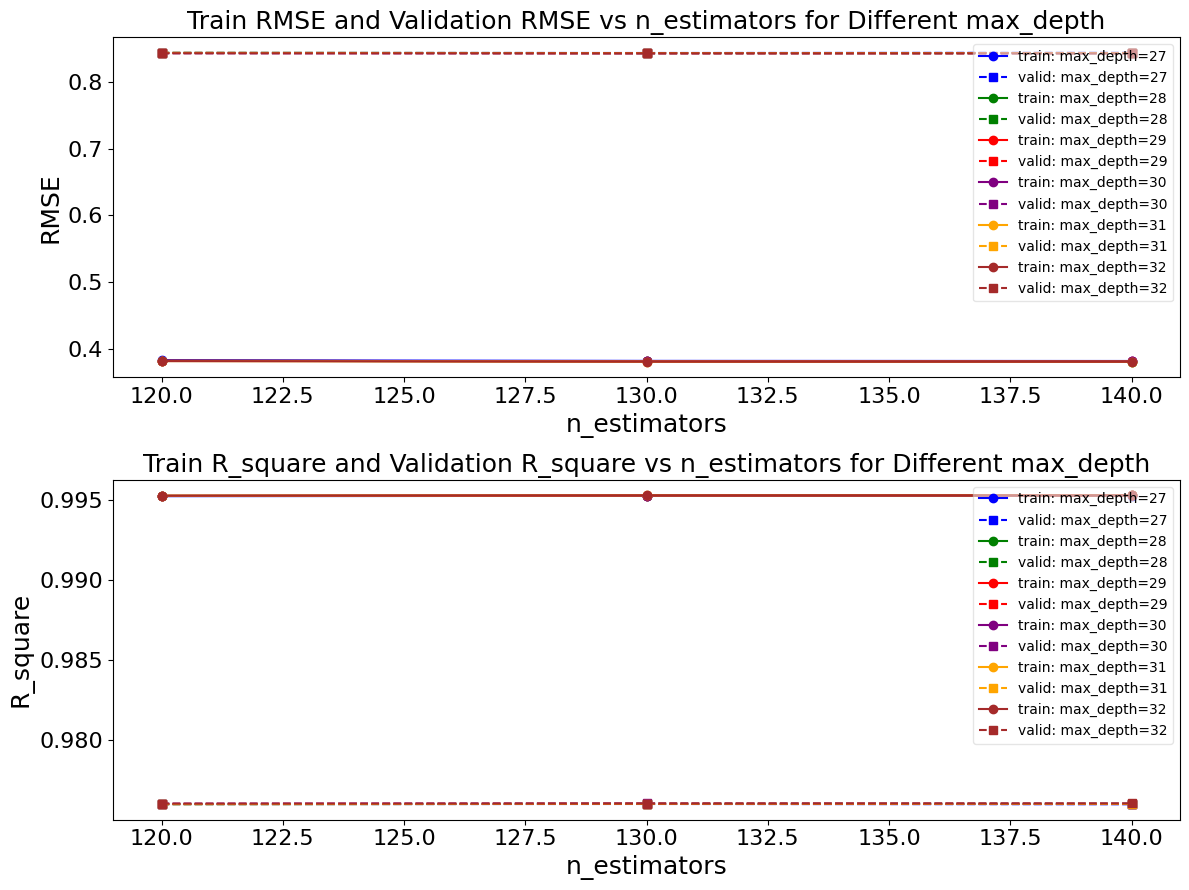

In [44]:
result_data = pd.read_csv("results_202402230144_n_estimators-120-140-3_max_depth-27-32-6_min_samples_leaf-2-5-4_min_samples_split-2-3-2_RFFSO.csv")
df = result_data

# 找出train_mse最大的一行
min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]

print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]

print("valid_mse best:")
print(min_valid_mse_row)

select_esti = df[(df['min_samples_leaf'] == 2) & (df['min_samples_split'] == 3)]
plot_results(select_esti, group_column='max_depth', Xaxis='n_estimators', metrics='RMSE', metrics1='R_square')